In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Corn/Train'
valid_path = '/content/gdrive/MyDrive/Corn/Train'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/Corn/Train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Corn/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3240 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Common_rust': 1,
 'Healthy': 2,
 'Northern_Leaf_Blight': 3}

In [ ]:
print(training_set.class_indices) #prints every single key and class of that dataset
labels = '\n'.join(sorted(training_set.class_indices.keys())) #print all these keys as a list of labels into a text file called labels.txt
with open('labels.txt', 'w') as f: #writes to the labels.txt file, and if it doesnt exists, it creates one, and if it does exist, it will overrite it. (thats what 'w' is for)
    f.write(labels)

{'Cercospora_leaf_spot Gray_leaf_spot': 0, 'Common_rust': 1, 'Healthy': 2, 'Northern_Leaf_Blight': 3}


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Corn/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

FileNotFoundError: ignored

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
102/102 [==============================] - 749s 7s/step - loss: 1.6058 - accuracy: 0.8361 - val_loss: 1.5147 - val_accuracy: 0.8177
Epoch 2/20
102/102 [==============================] - 59s 572ms/step - loss: 0.5317 - accuracy: 0.9265 - val_loss: 1.6861 - val_accuracy: 0.8177
Epoch 3/20
102/102 [==============================] - 56s 550ms/step - loss: 0.7011 - accuracy: 0.9114 - val_loss: 0.5849 - val_accuracy: 0.9259
Epoch 4/20
102/102 [==============================] - 55s 541ms/step - loss: 0.5633 - accuracy: 0.9336 - val_loss: 0.5936 - val_accuracy: 0.9274
Epoch 5/20
102/102 [==============================] - 57s 556ms/step - loss: 0.6398 - accuracy: 0.9373 - val_loss: 2.7038 - val_accuracy: 0.8248
Epoch 6/20
102/102 [==============================] - 58s 563ms/step - loss: 0.6805 - accuracy: 0.9346 - val_loss: 0.8618 - val_accuracy: 0.9188
Epoch 7/20
102/102 [==============================] - 55s 542ms/step - loss: 0.4676 - accuracy: 0.9503 - val_loss: 0.5940 - val_accu

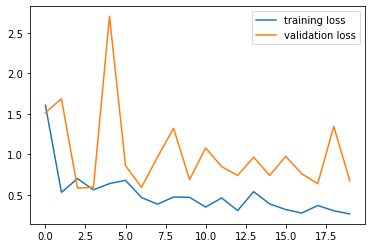

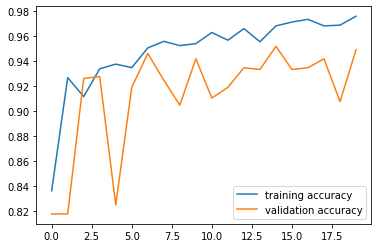

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossValidation_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccuracyValidation_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('corn_model.h5')
model.save_weights('corn_weights.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 8.9012348e-33, 4.4439061e-33, 9.1679878e-14],
       [3.2514094e-15, 2.5226976e-27, 0.0000000e+00, 1.0000000e+00],
       ...,
       [2.0843835e-32, 2.3720597e-14, 0.0000000e+00, 1.0000000e+00],
       [9.9999738e-01, 2.4793871e-06, 2.5000324e-21, 1.0055059e-07],
       [1.0000000e+00, 8.9713331e-38, 0.0000000e+00, 5.5529217e-24]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 0, 3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 1, 0, 3, 1, 3, 3, 3, 0, 3, 2,
       2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 0, 0, 0, 3, 0, 3, 2, 1, 2, 2, 1, 0,
       3, 3, 0, 3, 3, 1, 1, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 0, 0, 3, 2, 3,
       1, 3, 0, 0, 3, 0, 1, 1, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 3, 0, 0, 2,
       1, 2, 0, 2, 3, 2, 2, 1, 0, 3, 3, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1, 0,
       3, 2, 0, 1, 0, 2, 3, 3, 3, 1, 3, 2, 0, 1, 3, 3, 0, 1, 0, 1, 2, 3,
       0, 3, 2, 2, 2, 2, 3, 1, 0, 2, 2, 2, 1, 0, 2, 0, 3, 0, 1, 3, 1, 3,
       1, 2, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3,
       0, 1, 1, 3, 3, 3, 3, 0, 0, 1, 3, 1, 1, 2, 3, 0, 2, 1, 1, 3, 2, 3,
       2, 1, 3, 1, 3, 1, 0, 0, 3, 0, 2, 2, 1, 1, 0, 3, 3, 2, 3, 2, 3, 1,
       1, 1, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1, 3, 3, 2, 3, 1, 3, 1, 3, 3,
       1, 2, 2, 2, 2, 3, 2, 0, 3, 2, 2, 1, 2, 1, 2, 3, 3, 2, 3, 0, 3, 3,
       3, 3, 2, 3, 2, 0, 3, 3, 2, 2, 3, 1, 0, 1, 1,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('corn_model.h5')
weights = model.load_weights('corn_weights.h5')

In [ ]:
img=image.load_img('/content/gdrive/MyDrive/Corn/Test/Northern_Leaf_Blight/image (752).JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 55.,  68.,  38.],
        [ 46.,  59.,  29.],
        [ 47.,  60.,  30.],
        ...,
        [ 78.,  72.,  76.],
        [ 91.,  81.,  89.],
        [101.,  89.,  99.]],

       [[ 56.,  69.,  39.],
        [ 56.,  69.,  39.],
        [ 57.,  70.,  40.],
        ...,
        [ 87.,  81.,  85.],
        [ 98.,  88.,  96.],
        [105.,  93., 103.]],

       [[ 54.,  67.,  37.],
        [ 60.,  73.,  43.],
        [ 59.,  72.,  42.],
        ...,
        [ 99.,  93.,  97.],
        [106.,  96., 104.],
        [110.,  98., 108.]],

       ...,

       [[ 76., 108.,  69.],
        [ 73., 103.,  65.],
        [ 67.,  98.,  57.],
        ...,
        [135., 120., 125.],
        [147., 132., 137.],
        [151., 136., 141.]],

       [[ 76., 108.,  69.],
        [ 73., 103.,  65.],
        [ 67.,  98.,  57.],
        ...,
        [136., 121., 126.],
        [147., 132., 137.],
        [150., 135., 140.]],

       [[ 74., 106.,  67.],
        [ 71., 101.,  63.],
        [ 64.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x= x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[4.2835412e-16, 1.0000000e+00, 6.2296490e-13, 1.1285562e-19]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1


array([ True])